In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pathlib

In [3]:
data_dir ="img_data"
data_dir = pathlib.Path(data_dir)
#查看数据的长度
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

922


In [4]:
#开始处理输入的数据集
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)

Found 923 files belonging to 2 classes.
Using 739 files for training.
Found 923 files belonging to 2 classes.
Using 184 files for validation.
['bleached_corals', 'healthy_corals']


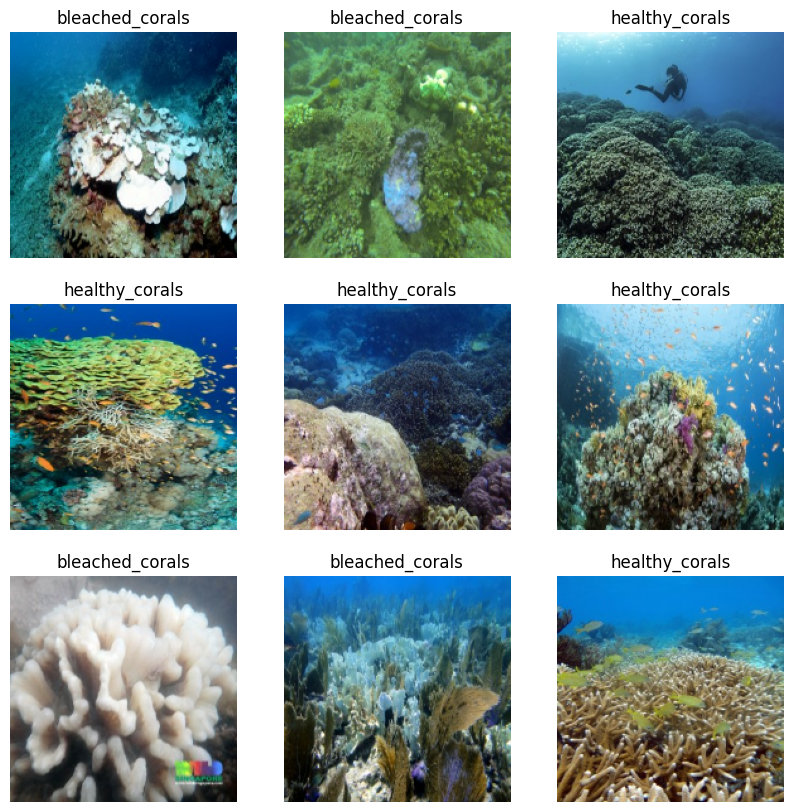

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:

#1.开始真正建模
model = Sequential([
  layers.Rescaling(1./255,input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
plt.show()

e:\5120IE\CoralKita\classification\.venv\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# 编译模型，相当于进行制定一个计划,也可以叫懒加载
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,988,898 (15.22 MB)

 Trainable params: 3,988,898 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

None


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9432 - loss: 0.1535 - val_accuracy: 0.6902 - val_loss: 0.7556
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9756 - loss: 0.0965 - val_accuracy: 0.6793 - val_loss: 0.9912
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9770 - loss: 0.0669 - val_accuracy: 0.6739 - val_loss: 1.2248
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9729 - loss: 0.0877 - val_accuracy: 0.6848 - val_loss: 1.2526
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9675 - loss: 0.0789 - val_accuracy: 0.7120 - val_loss: 1.1973
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9675 - loss: 0.0847 - val_accuracy: 0.6630 - val_loss: 1.2877
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9892 - loss: 0.0406 - val_accuracy: 0.6685 - val_loss: 1.4161
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9959 - loss: 0.0313 - val_accuracy: 0.6902 - v

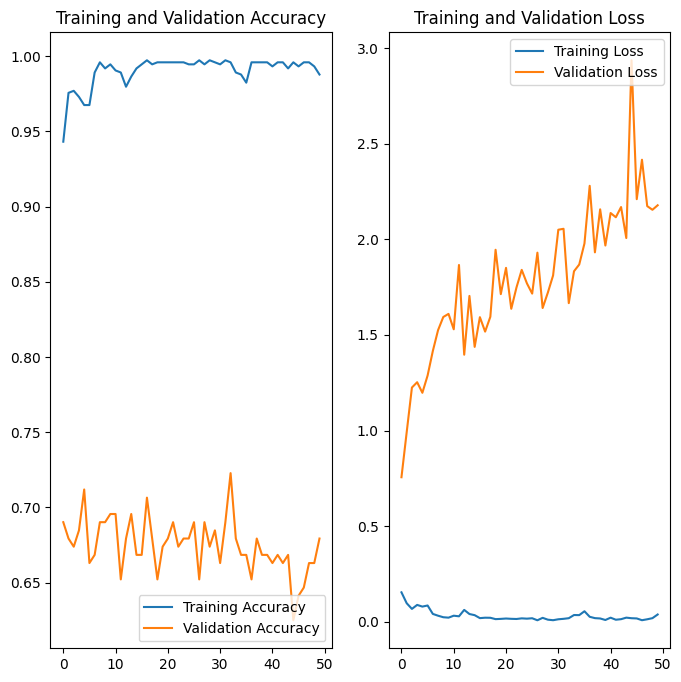

In [10]:
# #开始训练模型，fit 相当与一个action。给模型输入数据，
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
#保存模型，方便后续预测调用
model.save("mode/model.h5")
#可视化最终的一个训练结果
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
#可视化查看训练结果
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
# #加载模型
mode_path="mode/model.h5"
model=models.load_model(mode_path)

dog_01_path="coral.jpg"
# 用tf的工具来处理输入图片
img = tf.keras.utils.load_img(
    dog_01_path, target_size=(180, 180)
)
dog_01 = tf.keras.utils.img_to_array(img)

dog_01 = tf.expand_dims(dog_01, 0) # Create a batch
print(dog_01.shape)

#预测的结果为一个概率表[[],[]] ,之所以为这样的结构，是因为你可以同时预测多张图片
result_p=model.predict(dog_01)[0]
for p,re in zip(result_p,class_names):
    print("{}的概率为{}".format(re,p))
#取出概率最大的值所在索引，并映射出原来的分类标准
max_index=list(np.where(result_p==np.max(result_p)))[0][0]
#
print("最终预测的结果为：{}".format(class_names[max_index]))

(1, 180, 180, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
bleached_corals的概率为-5.214101791381836
healthy_corals的概率为1.618964433670044
最终预测的结果为：healthy_corals
